# Foundations of Machine Learning Frameworks Lab-5
Name: Devanshi Joshi   
Id: 8868052

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  

In [35]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Function for calculating MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Kfold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mape': make_scorer(mape, greater_is_better=False)
}

# Evaluating the polynomial models of degrees 0 to 8
degrees = list(range(9))
results = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
    
    r2_mean = round(np.mean(scores['test_r2']), 3)
    r2_std = round(np.std(scores['test_r2']), 3)
    
    mae_mean = round(-np.mean(scores['test_mae']), 3)
    mae_std = round(np.std(scores['test_mae']), 3)
    
    mape_mean = round(-np.mean(scores['test_mape']), 3)
    mape_std = round(np.std(scores['test_mape']), 3)
    
    r2_scores_rounded = [round(score, 3) for score in scores['test_r2']]
    mae_scores_rounded = [round(-score, 3) for score in scores['test_mae']]
    mape_scores_rounded = [round(-score, 3) for score in scores['test_mape']]
    
    results.append({
        'Degree': degree,
        
        'R2 Scores': r2_scores_rounded,
        'R2 Mean': r2_mean,
        'R2 Std': r2_std,

        'MAE Scores': mae_scores_rounded,
        'MAE Mean': mae_mean,
        'MAE Std': mae_std,

        'MAPE Scores': mape_scores_rounded,
        'MAPE Mean': mape_mean,
        'MAPE Std': mape_std
    })
df = pd.DataFrame(results).set_index('Degree')
print(df)


                                             R2 Scores  R2 Mean  R2 Std                                     MAE Scores  MAE Mean  MAE Std                                    MAPE Scores  MAPE Mean  MAPE Std
Degree                                                                                                                                                                                                       
0               [-0.012, -0.027, -0.015, -0.0, -0.042]   -0.019   0.014        [64.006, 70.578, 59.83, 70.054, 65.426]    65.979    3.994       [62.792, 58.006, 49.834, 70.429, 70.617]     62.336     7.865
1                  [0.453, 0.573, 0.391, 0.584, 0.391]    0.478   0.085       [42.794, 41.583, 47.223, 42.122, 47.626]    44.270    2.608          [37.5, 32.545, 40.389, 40.472, 46.79]     39.539     4.631
2                  [0.416, 0.497, 0.176, 0.385, 0.355]    0.366   0.106         [43.582, 44.1, 51.509, 53.079, 49.345]    48.323    3.850        [38.286, 34.43, 42.634, 48.775,

The Values of the Metrics:
- Higher values of R^2 imply that the model explains a greater proportion of the target variable. A low value of R^2 shows that the model outperforms a horizontal hyperplane.
- Mean Absolute Error is the average absolute difference between predicted values and the actual values. Lower values are considered better because they denote that the model predictions are more accurate.
- Mean Absolute Percentage Error represents the average percentage difference between predicted values and actual values. Lower values are better, denoting that the model's predictions are more accurate in percentage terms.   

According to the table of the metrics for the degrees between 0 and 8:
* **Polynomial Degree 0**: The model predicts the target variable's mean for all inputs. As a result, the R2 is close slightly negative due to minor fluctuation but near to zero.
* **Polynomial Degree 1**: Has a reasonable R^2 (0.478) but the lowest MAE (44.270) and MAPE (39.539). This indicates that the predictors have a linear relationship. 
* **Polynomial Degree 2**: The performance of the model is slightly lower than that of the first-degree polynomial with R^2 of 0.366, MAE of48.323 and MAPE of 42.283.
* **Polynomial Degree 3 and higher**: Polynomial Degree 3 and higher: Performance drops, with R2 values being severely negative, indicating that the models fit worse than a simple horizontal line. MAE and MAPE values rise dramatically as well.

#### Based on the metrics measured for the models:
- The polynomial model of degree 1 is the best.
#### Reasons for selecting the Degree 1 model:
It has the highest R2 value, implying that it explains the most variance among the models being considered. It has the lowest MAE and MAPE values when compared to the other models, indicating that its predictions are more accurate in both absolute and percentage terms. Models with degrees larger than 2 had much lower metrics, indicating that they were overfitting to the training data and capturing noise.

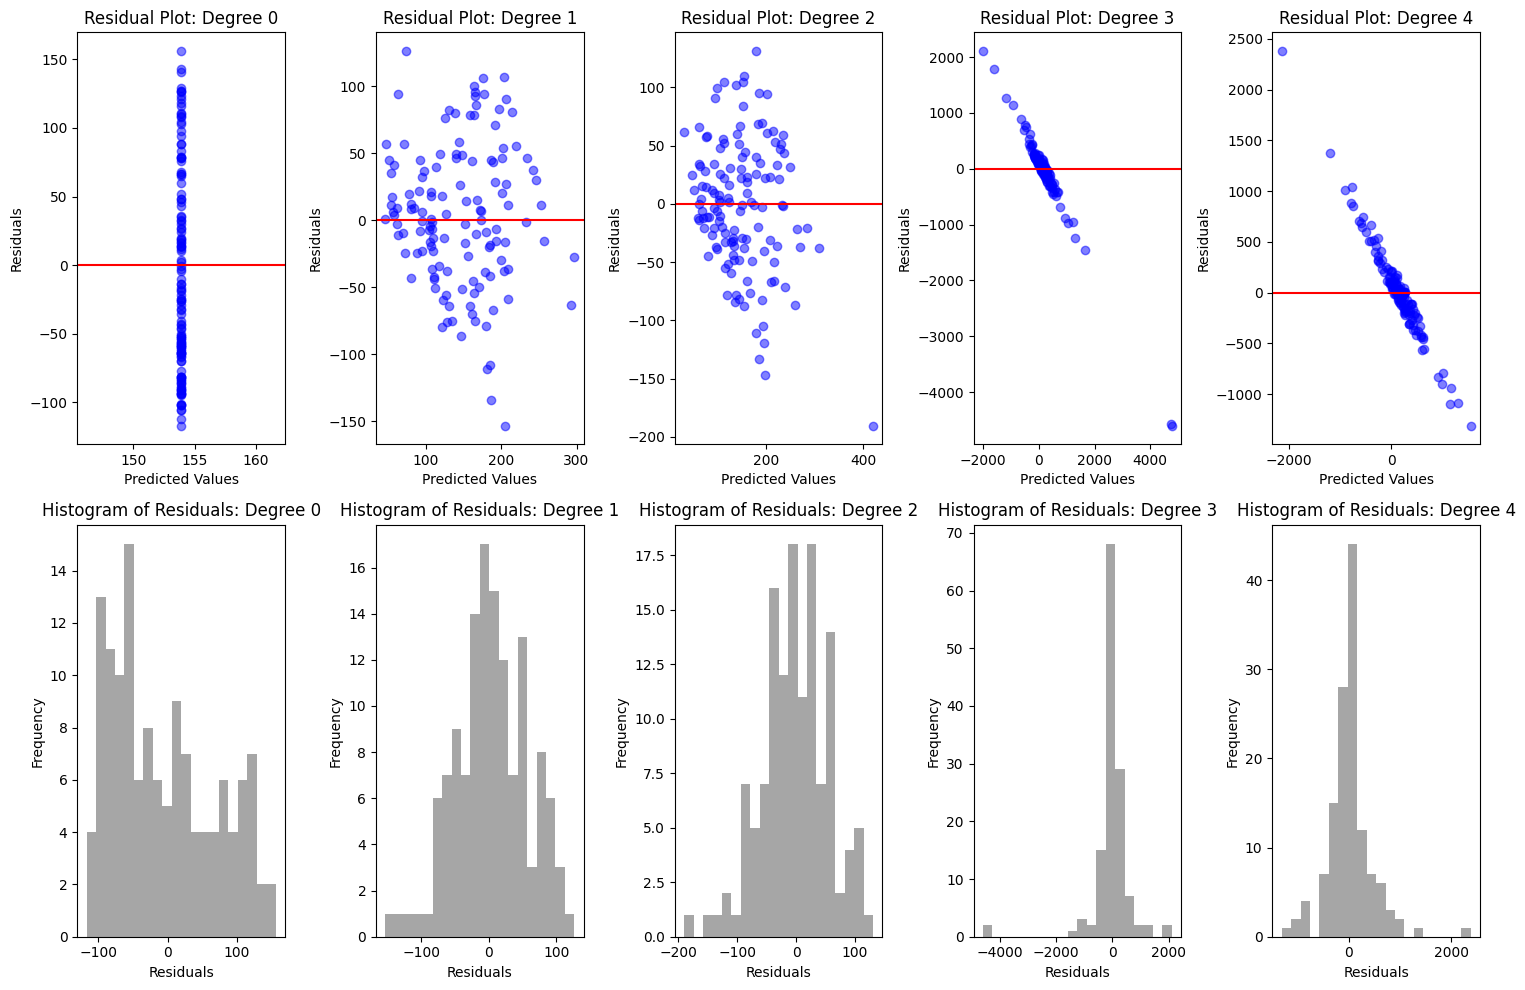

In [37]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(15, 10))

# Analysis for degrees 0 to 4
for degree in range(5):
    # Fit and Predict
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Residual Plot
    plt.subplot(2, 5, degree + 1)
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title(f'Residual Plot: Degree {degree}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Histogram of Residuals
    plt.subplot(2, 5, degree + 6)
    plt.hist(residuals, bins=20, color='grey', alpha=0.7)
    plt.title(f'Histogram of Residuals: Degree {degree}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Looking into the above residual plots:
- Degree 0 plots: The residuals form a vertical line, indicating a constant value forecasting independent of input. The residuals histogram shows a distribution centered around zero, but this is not useful due to its simplicity and not optimal.
- Degree 1 plots: The residual plot indicates random distribution around zero, suggesting a better linear model fit than the constant model. The residuals histogram is more symmetric around 0, indicating normal distribution, a positive sign for linear regression models.
- Degree 2 plots: The residual plot shows scattered residuals, suggesting overfitting or insufficient capture of nonlinear characteristics. The residuals histogram is skewed, suggesting the model's non-normality, potentially suggesting the model's inability to match the data effectively. Both indicators suggest the model's inability to accurately represent the data.
- Degree 3 plots: The residual plot shows a funnel shape, indicating heteroscedasticity, indicating the cubic model's ineffectiveness for the dataset. The skewed histogram reveals systematic mistakes in the model, further emphasizing the model's inadequacy.
- Degree 4 plots: The residual plot shows a funnel shape and a curve, indicating model inadequacy and possible overfitting. The residuals histogram, although less skewed than in degree 3, still has a non-normal distribution, which is undesirable.

#### Insights:
* Degree 0 (Constant Model) is straightforward and fails to detect any patterns in the data.
* Degree 1 (Linear Model) appears to be the best of the degrees offered. Its residuals are randomly distributed and have a near-normal distribution, making them appropriate for linear regression.
* Models with degrees 2 and above begin to show evidence of overfitting or not effectively capturing the non-linear patterns in the data. Higher degrees of variability indicate that these models are not acceptable.
* As the degree increases, so does the model complexity, which may result in overfitting. The patterns in the residual plots for higher degrees demonstrate this.